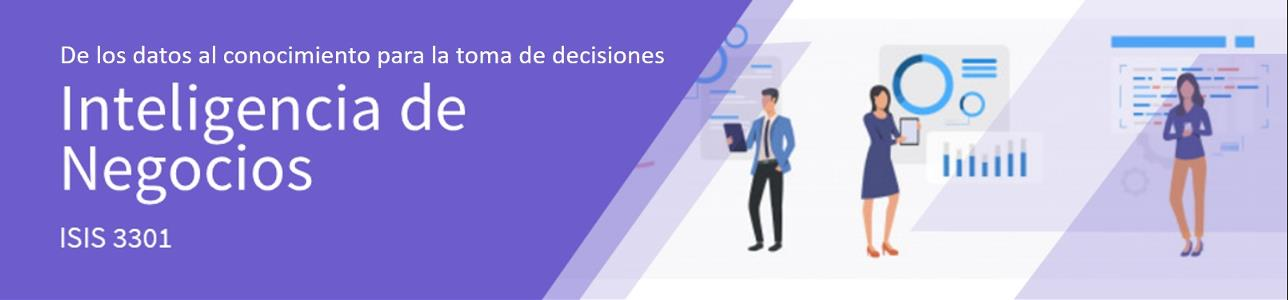

## Problema
El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar, Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual manera, quieren comparar las características de dichos sitios, con aquellos que han obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el turismo.

Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos. Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos actores quieren lograr un análisis independiente de los conjuntos de datos y al final del proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que acompañarán el desarrollo real de este proyecto.

### 1. Instalación e importanción de librerías.


In [1]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.4 MB/s eta 0:00:00


In [3]:
# librería para manejar perfiles de datos en Python.
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=c85dc34625a16526e1041c9aeea84a5d424df687a62339da63893b59c9688372
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [4]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [23]:
# Instalación de librerias
import pandas as pd
import numpy as np

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

from wordcloud import WordCloud, STOPWORDS

from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt

### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos

In [24]:
data=pd.read_csv("https://raw.githubusercontent.com/Laudarias/BI-Proyecto1-GProy22/main/tipo2_entrenamiento_estudiantes.csv")
data.head()

Review  Class
0  Muy buena atención y aclaración de dudas por p...      5
1  Buen hotel si están obligados a estar cerca de...      3
2  Es un lugar muy lindo para fotografías, visite...      5
3  Abusados con la factura de alimentos siempre s...      3
4  Tuvimos un par de personas en el grupo que rea...      3

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


In [26]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train.head()

Review  Class
6676  mucho cuidado con este hotel en particular  ya...      1
3139  Si se tiene 2 horas no deje d visitarlo. Una v...      5
205   Un lugar excelente para degustar platos tipico...      5
1360  La limpieza dejaba bastante que desear así com...      3
5017  Leí las opiniones de los demás huéspedes, y de...      1

#### Entendimiento de los Datos

In [27]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
def show_cloud(words,stopwords=[]):
    comment_words = ''

    for val in words:

        val = str(val)

        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

---------- Palabras para la clase 1 ----------


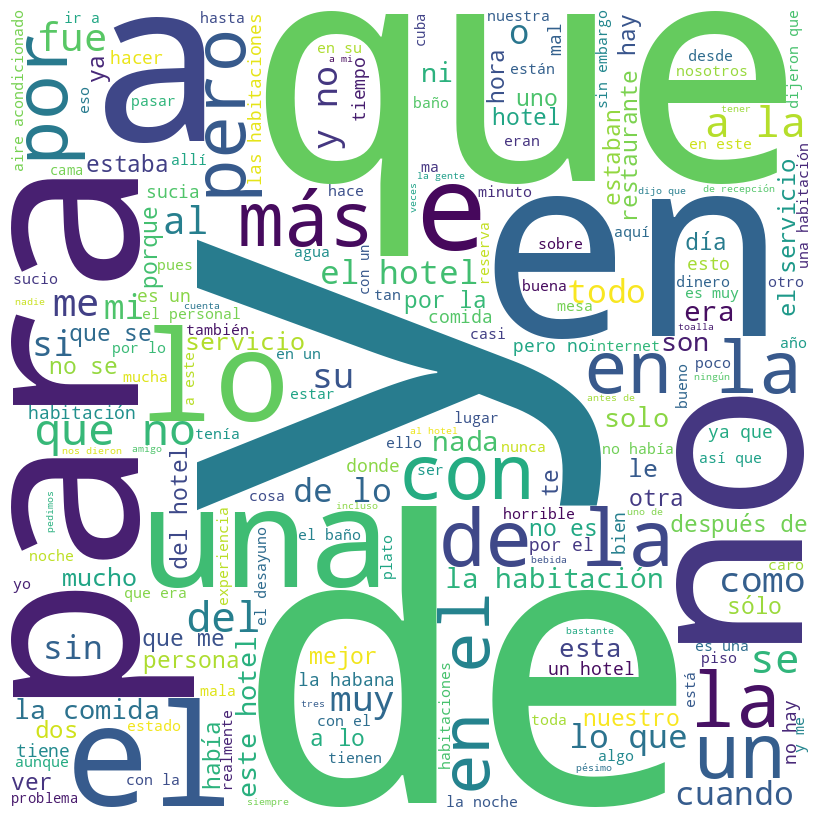

---------- Palabras para la clase 5 ----------


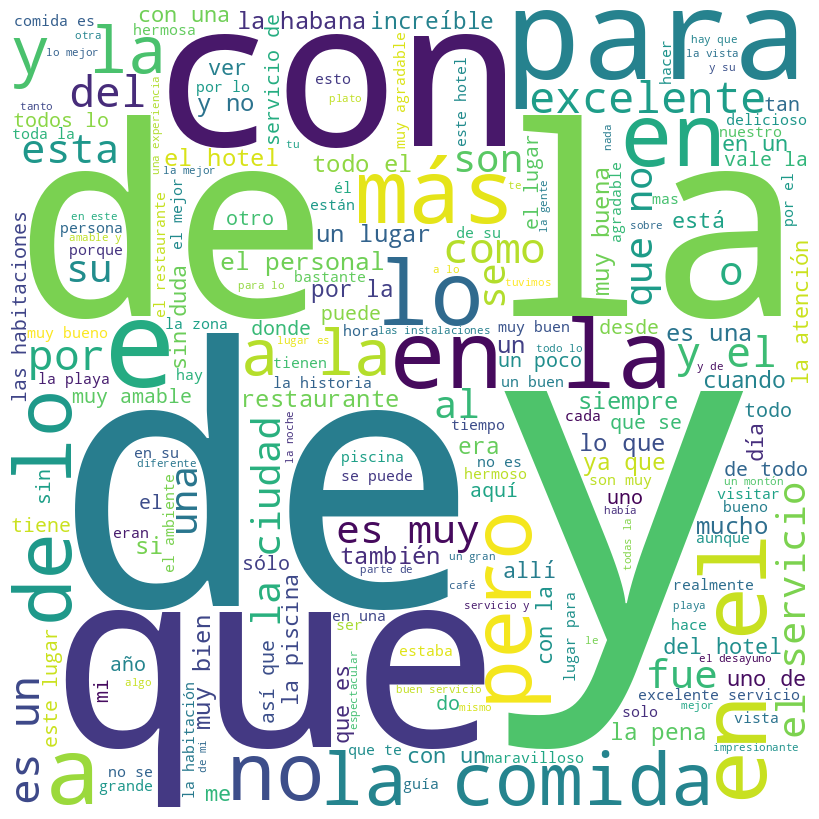

---------- Palabras para la clase 3 ----------


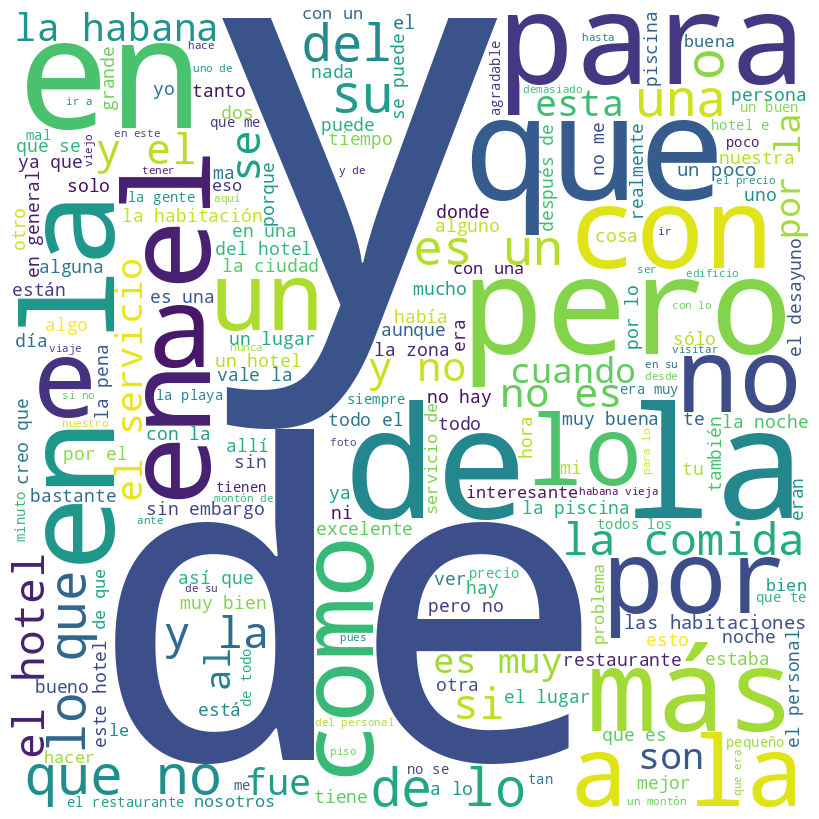

---------- Palabras para la clase 4 ----------


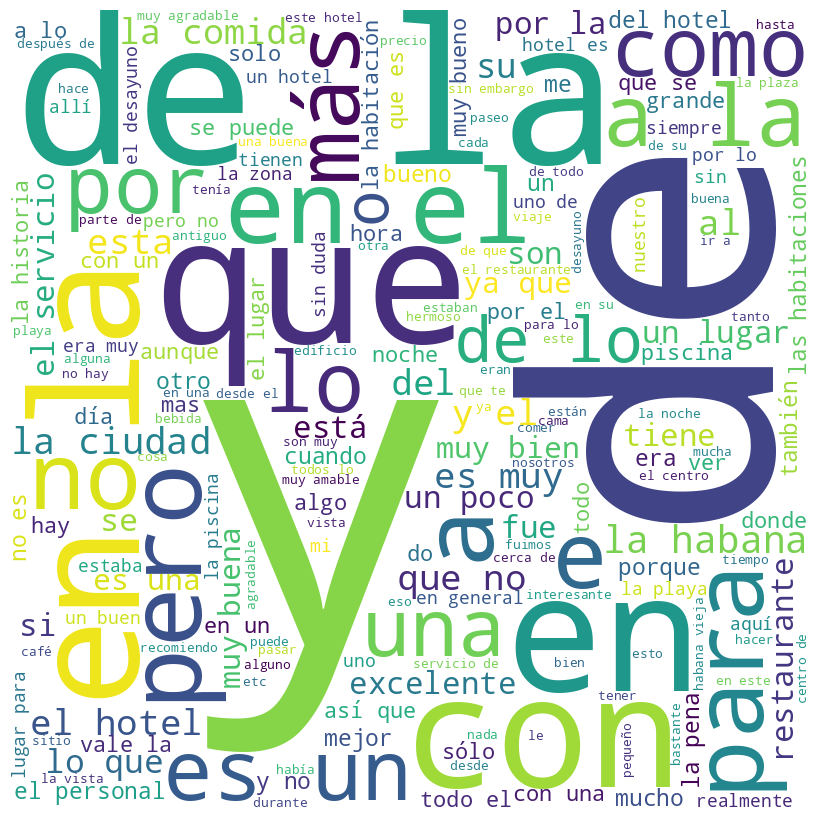

---------- Palabras para la clase 2 ----------


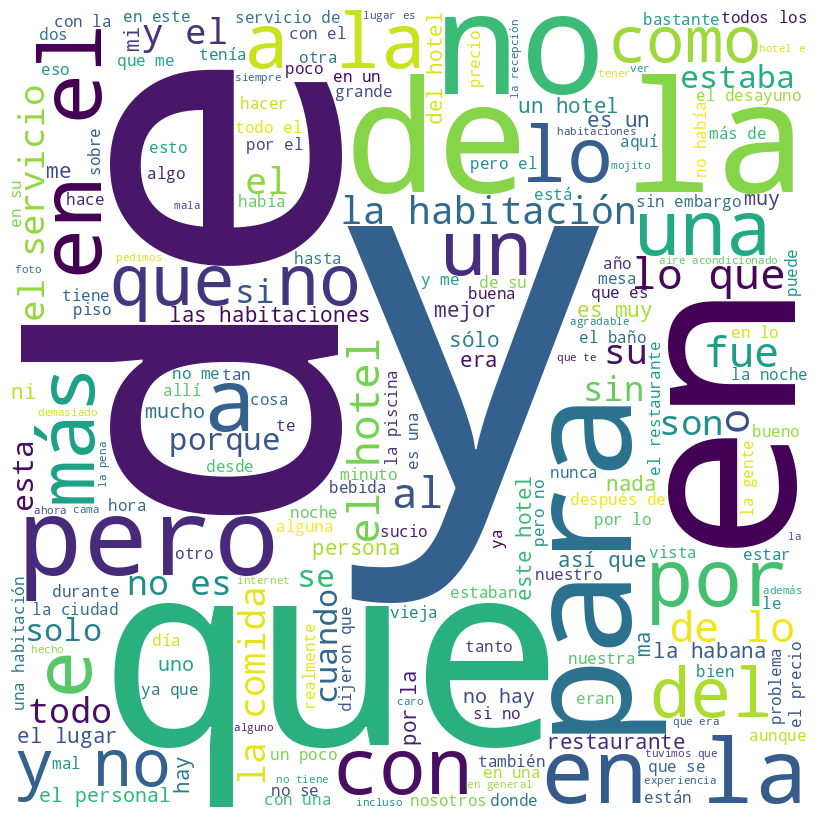

In [29]:
for i in train['Class'].unique():
    print(f'---------- Palabras para la clase {i} ----------')
    show_cloud(train.loc[train['Class']==i,'Review'])

---------- Palabras para la clase 1 ----------


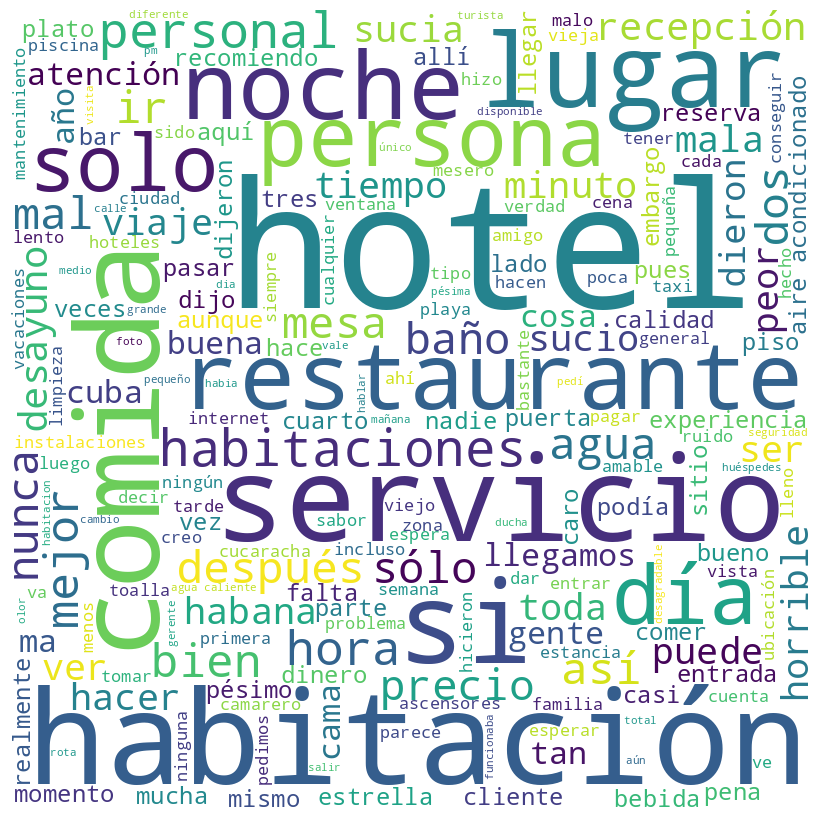

---------- Palabras para la clase 5 ----------


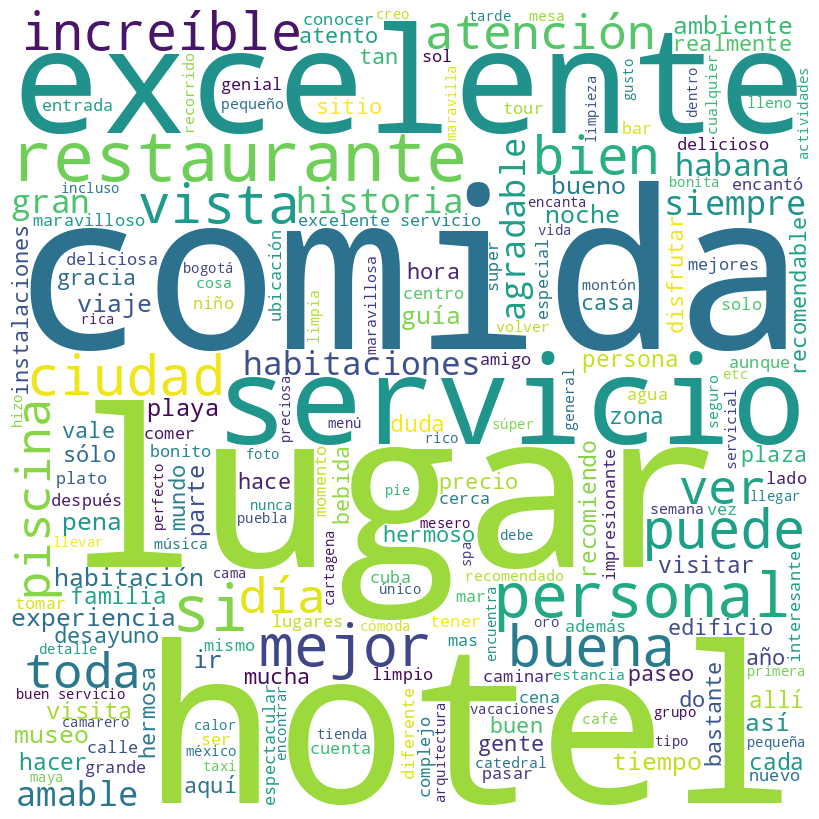

---------- Palabras para la clase 3 ----------


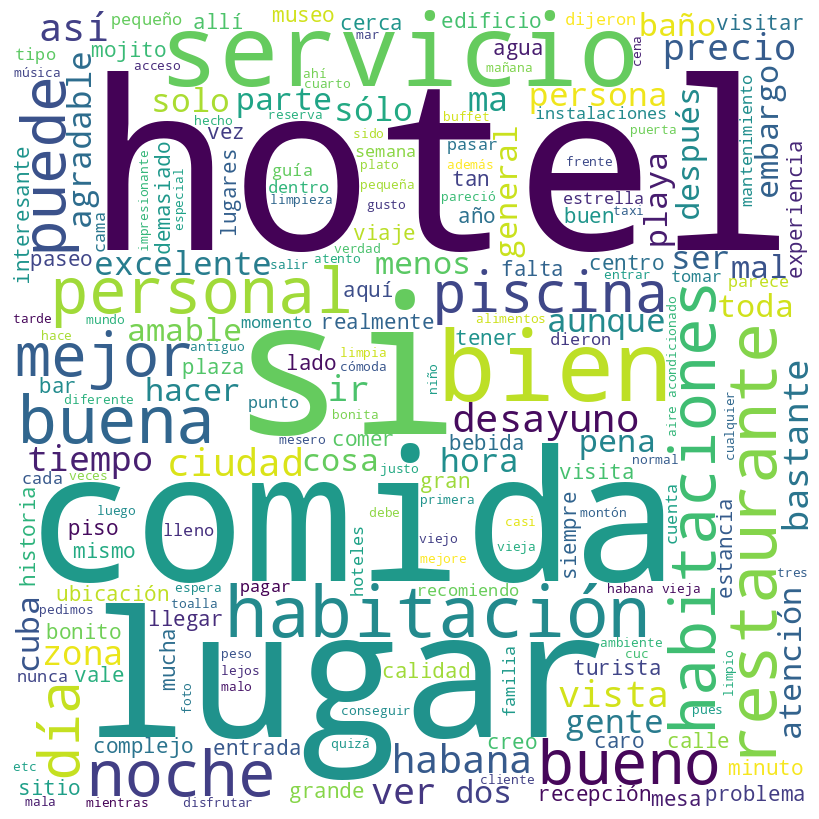

---------- Palabras para la clase 4 ----------


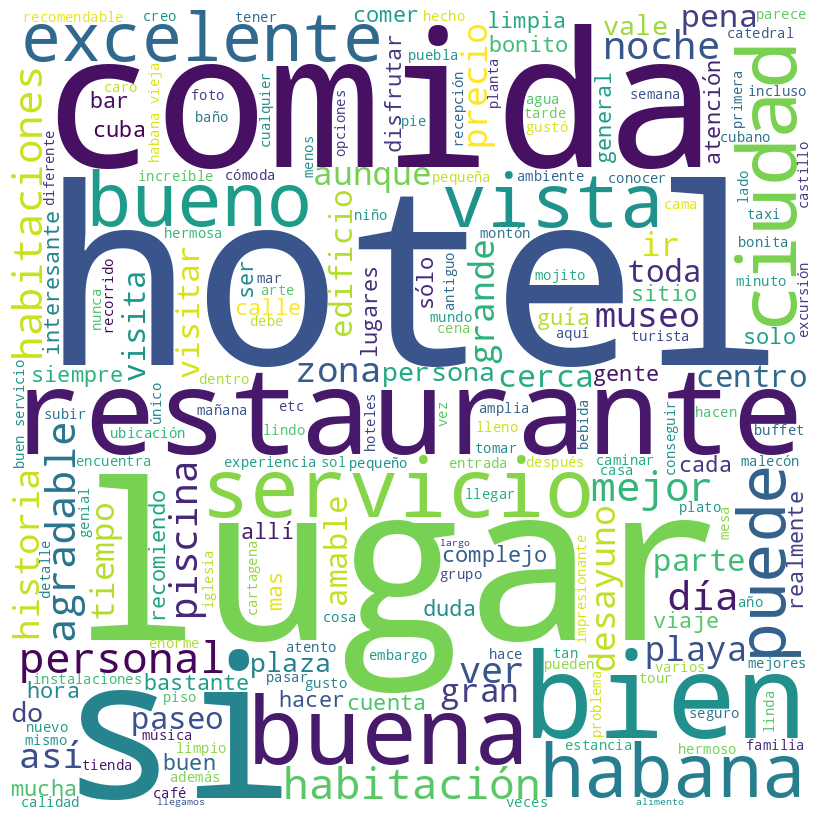

---------- Palabras para la clase 2 ----------


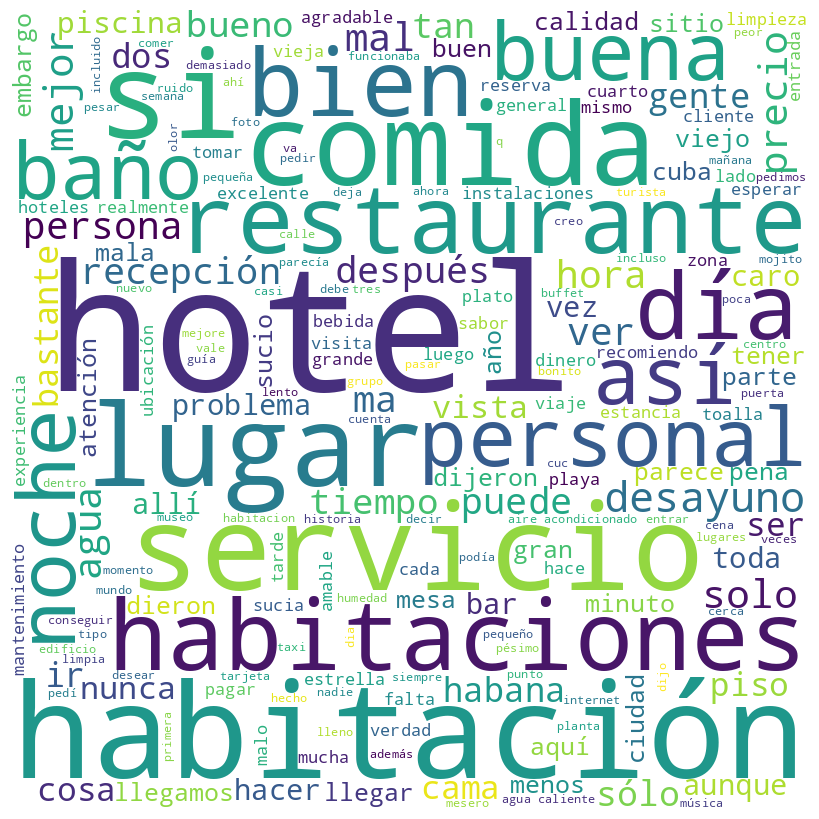

In [30]:
stop_words = stopwords.words('spanish')

for i in train['Class'].unique():
    print(f'---------- Palabras para la clase {i} ----------')
    show_cloud(train.loc[train['Class']==i,'Review'], stopwords=stop_words)

In [31]:
X_train, y_train = train['Review'], train['Class']
display(X_train)
y_train

6676    mucho cuidado con este hotel en particular  ya...
3139    Si se tiene 2 horas no deje d visitarlo. Una v...
205     Un lugar excelente para degustar platos tipico...
1360    La limpieza dejaba bastante que desear así com...
5017    Leí las opiniones de los demás huéspedes, y de...
                              ...                        
2706    Es impresionante la pirámide de Kukulcán... va...
578     Antiguo hotel de glamour sin duda antes de la ...
5848    Falta aire acondicionado y pese a que si hay o...
2439    Tuvimos una excelente experiencia, César quien...
7188    Instalaciones:  Restaurante pequeño,  con musi...
Name: Review, Length: 6300, dtype: object

6676    1
3139    5
205     5
1360    3
5017    1
       ..
2706    4
578     2
5848    2
2439    5
7188    2
Name: Class, Length: 6300, dtype: int64

### 3. Preparación de datos

#### **3.1 Limpieza de los datos**

In [32]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### **3.2 Tokenización**

In [33]:
new_X_train = X_train.apply(word_tokenize)

In [34]:
new_X_train = new_X_train.apply(preproccesing) #Aplica la eliminación del ruido

new_X_train.head()

6676    [cuidado, hotel, particular, aparte, caro, sup...
3139    [si, 2, horas, deje, d, visitarlo, verdadera, ...
205     [lugar, excelente, degustar, platos, tipicos, ...
1360    [limpieza, dejaba, bastante, desear, asi, inst...
5017    [lei, opiniones, demas, huespedes, debo, decir...
Name: Review, dtype: object

#### **3.3. Normalización**

In [35]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

new_X_train = new_X_train.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
new_X_train.head()

6676    [cuid, hotel, particul, apart, car, sup, suci,...
3139    [si, 2, hor, dej, d, visit, verdader, joy, his...
205     [lug, excelent, degust, plat, tipic, cocktails...
1360    [limpiez, dej, bastant, des, asi, instal, dent...
5017    [lei, opinion, dem, huesped, deb, dec, si, rea...
Name: Review, dtype: object

##### **3.4 Selección de campos**

In [36]:
train['trans'] = new_X_train.apply(lambda x: ' '.join(map(str, x)))
train

Review  Class  \
6676  mucho cuidado con este hotel en particular  ya...      1   
3139  Si se tiene 2 horas no deje d visitarlo. Una v...      5   
205   Un lugar excelente para degustar platos tipico...      5   
1360  La limpieza dejaba bastante que desear así com...      3   
5017  Leí las opiniones de los demás huéspedes, y de...      1   
...                                                 ...    ...   
2706  Es impresionante la pirámide de Kukulcán... va...      4   
578   Antiguo hotel de glamour sin duda antes de la ...      2   
5848  Falta aire acondicionado y pese a que si hay o...      2   
2439  Tuvimos una excelente experiencia, César quien...      5   
7188  Instalaciones:  Restaurante pequeño,  con musi...      2   

                                                  trans  
6676  cuid hotel particul apart car sup suci cambi s...  
3139  si 2 hor dej d visit verdader joy histor bien ...  
205   lug excelent degust plat tipic cocktails ambie...  
1360  limpiez dej bastant des asi instal dentr cub e...  
5017  lei opinion dem huesped deb dec si realment fa...  
...                                                 ...  
2706  impresion piramid kukulc val pen asol llev som...  
578   antigu hotel glamour dud revolucion renov incr...  
5848  falt air acondicion pes si organiz acces permi...  
2439  excelent experient ces atendi brind experient ...  
7188  instal restaur pequen music fond 2 simultan pr...  

[6300 rows x 3 columns]

## 4. Creación y Aplicación de los modelos


In [37]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    def remove_non_ascii(self, words):
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        new_X_train = pd.Series(X)
        new_X_train = new_X_train.apply(contractions.fix)
        new_X_train = new_X_train.apply(word_tokenize)
        new_X_train = new_X_train.apply(lambda x: self.preproccesing(x))
        new_X_train = new_X_train.apply(lambda x: self.stem_and_lemmatize(x))
        new_X_train = new_X_train.apply(lambda x: ' '.join(map(str, x)))
        return new_X_train

## 4.1 Modelo SVM

In [38]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', SVC(kernel='linear', probability=True))
    ]

pipe_SVM = Pipeline(estimators)

pipe_SVM.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 95.7 ms, total: 1min 50s
Wall time: 1min 55s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', SVC(kernel='linear', probability=True))])

In [39]:
y_pred_train_SVM = pipe_SVM.predict(X_train)
y_pred_train_SVM

array([1, 5, 5, ..., 2, 5, 2])

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

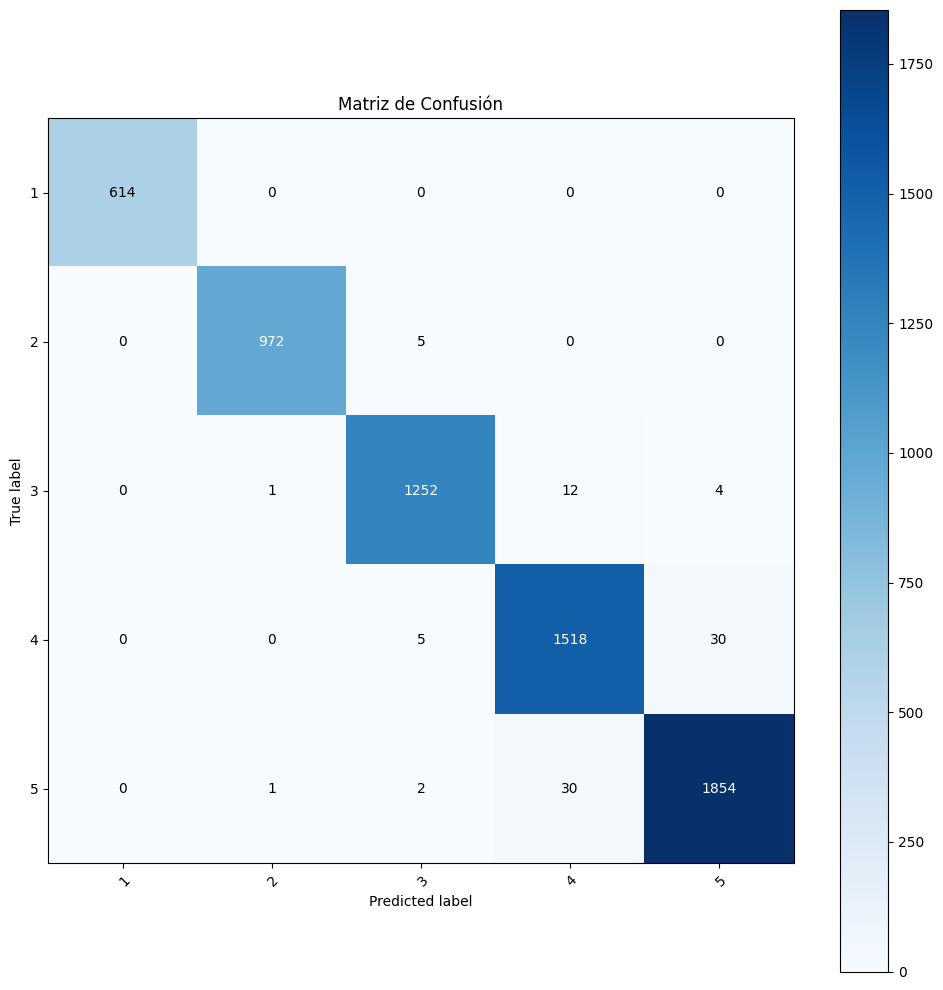

In [41]:
%matplotlib inline

classes = pipe_SVM['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_SVM, classes=classes,
                      title='Matriz de Confusión')

In [52]:
report_SVC = classification_report(y_train, y_pred_train_SVM)

print("Reporte de Entrenamiento para Support Vector Machines\n", report_SVC)

Reporte de Entrenamiento para Support Vector Machines
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       614
           2       1.00      0.99      1.00       977
           3       0.99      0.99      0.99      1269
           4       0.97      0.98      0.98      1553
           5       0.98      0.98      0.98      1887

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300



In [53]:
precision = accuracy_score(y_train, y_pred_train_SVM)

print("Precisión del modelo:", precision)

Precisión del modelo: 0.9857142857142858


## 4.2 Modelo Naive Bayes

In [44]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', MultinomialNB())
    ]

pipe_NB = Pipeline(estimators)

pipe_NB.fit(X_train, y_train)

CPU times: user 14.8 s, sys: 59.7 ms, total: 14.8 s
Wall time: 15.6 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', MultinomialNB())])

In [45]:
y_pred_train_NB = pipe_NB.predict(X_train)
y_pred_train_NB

array([1, 5, 5, ..., 4, 5, 2])

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

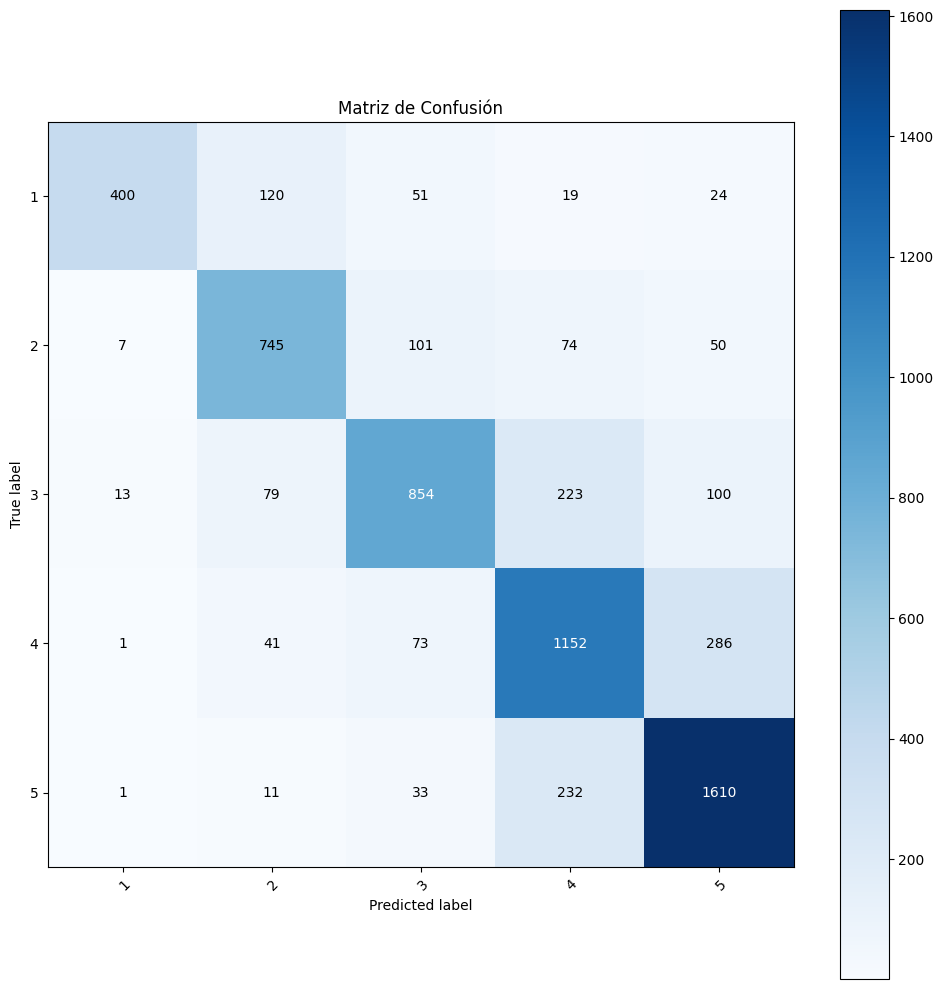

In [46]:
%matplotlib inline

classes = pipe_NB['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_NB, classes=classes,
                      title='Matriz de Confusión')

In [54]:
report_NB = classification_report(y_train, y_pred_train_NB)

print("Reporte de Entrenamiento para Naive Bayes\n", report_NB)

Reporte de Entrenamiento para Naive Bayes
               precision    recall  f1-score   support

           1       0.95      0.65      0.77       614
           2       0.75      0.76      0.76       977
           3       0.77      0.67      0.72      1269
           4       0.68      0.74      0.71      1553
           5       0.78      0.85      0.81      1887

    accuracy                           0.76      6300
   macro avg       0.78      0.74      0.75      6300
weighted avg       0.76      0.76      0.76      6300



In [48]:
precision = accuracy_score(y_train, y_pred_train_NB)

print("Precisión del modelo:", precision)

Precisión del modelo: 0.7557142857142857


## 4.3 Modelo Random Forest

In [49]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', RandomForestRegressor())
    ]

pipe_RF = Pipeline(estimators)

pipe_RF.fit(X_train, y_train)

CPU times: user 3min 11s, sys: 262 ms, total: 3min 11s
Wall time: 3min 19s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', RandomForestRegressor())])

In [50]:
y_pred_train_RF = pipe_RF.predict(X_train)
y_pred_train_RF

array([1.19, 4.78, 4.86, ..., 2.67, 4.98, 1.73])

In [57]:
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)

mae_train_RF = mean_absolute_error(y_train, y_pred_train_RF)

r2_train_RF = r2_score(y_train, y_pred_train_RF)

print("Métricas de rendimiento en el conjunto de entrenamiento:")
print("Error cuadrático medio - Mean Squared Error (MSE):", mse_train_RF)
print("Error absoluto medio - Mean Absolute Error (MAE):", mae_train_RF)
print("R cuadrado - R-squared (R^2):", r2_train_RF)

Métricas de rendimiento en el conjunto de entrenamiento:
Error cuadrático medio - Mean Squared Error (MSE): 0.13159485714285712
Error absoluto medio - Mean Absolute Error (MAE): 0.2785968253968254
R cuadrado - R-squared (R^2): 0.9245420050670557
